In [310]:
import mdtraj as md
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import pyemma

import pyemma.plots as mplt

In [4]:
print("pyemma is %s"% pyemma.__version__)
print("pickle is %s"% pickle.format_version)

pyemma is 2.4
pickle is 4.0


In [159]:
## load topology
basedir = '/sc/orga/projects/filizm02a/work/alex'
top = md.load(basedir+u'/production/centered1_no_wat.gro')

resseq = np.array([res.resSeq for res in top.topology.residues])
dd1 = resseq[1:]-resseq[:-1]!=1

chainA_res = np.arange(0,452)
chainB_res = np.arange(452,827)
chainH_res = np.arange(827, 943)
chainL_res = np.arange(943, 1049)
ions_res = np.arange(1053,1056)
integrin = np.concatenate( ( chainA_res , chainB_res,  ions_res) ) 
antibody = np.concatenate( ( chainH_res, chainL_res))


In [160]:
[top.topology.residue(i).name for i in ions_res ]
#[ atom.index for atom in top.topology.residue(1).atoms]

['MG', 'CAL', 'CAL']

In [179]:
## calc mindist for all residues only on a few frames

pairs = np.array([[i,j] for i in antibody for j in integrin])
print(pairs.shape)

feat0 = pyemma.coordinates.featurizer(top) 
feat0.add_residue_mindist(residue_pairs=pairs)
inp = pyemma.coordinates.source( basedir+u'/production/prod1_no_wat_cluster.xtc' , feat0)
dist0 =inp.get_output(stride=10000)[0]

(184260, 2)


In [181]:
yy=feat0.describe()
yy[-3]

'RES_DIST (closest-heavy) ILE126 - MG2001'

In [184]:
cutoff = 0.8
keep_pairs = (dist0[0]<cutoff)
final_pairs = pairs[keep_pairs,:]
print(f'Keeping {keep_pairs.sum()} pairs that are within {cutoff:.2f} nm of the interface')

Keeping 300 pairs that are within 0.80 nm of the interface


In [183]:
# now recalc distances for all trajs for this set of pairs
feat = pyemma.coordinates.featurizer(top) 
feat.add_residue_mindist(residue_pairs=final_pairs)
inp = pyemma.coordinates.source( 
    [ basedir+u'/production/prod1_no_wat_cluster.xtc',
      basedir+u'/production2/prod2_no_wat_cluster.xtc'], feat)
dist1 =inp.get_output(stride=10)

A Jupyter Widget

In [326]:
len(feat.describe())

300

In [198]:
index = pd.MultiIndex.from_tuples(
    [(lab.split(' ')[2],lab.split(' ')[4]) for lab in feat.describe()], 
    names=['lab_ab', 'lab_int'])


#labels_antibody = pd.DataFrame([name.split(' ')[2] for name in feat.describe()])
#labels_integrin = pd.DataFrame([name.split(' ')[4] for name in feat.describe()])


In [358]:
cutcontact=.4
data1 = pd.DataFrame(dist1[0], columns=index)<cutcontact
data2 = pd.DataFrame(dist1[1], columns=index)<cutcontact

data1['traj'] = 'traj1'
data2['traj'] = 'traj2'
dconcat = pd.concat([data1,data2], axis=0) #, keys=['trj1','trj2'],names=['traj'])

In [359]:
contact_ave = pd.DataFrame((dconcat<.3).mean())

In [361]:
(dconcat).groupby('traj').mean().transpose()

/sc/orga/projects/filizm02a/general/software/anaconda/anaconda3_August2018/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


traj               traj1     traj2
lab_ab lab_int                    
THR35  GLU174   0.000000  0.000000
       THR183   0.000000  0.000000
ASN36  GLU174   0.014493  0.003484
       ASN175   0.000000  0.000000
       THR182   0.000000  0.000000
       THR183   0.978920  0.984901
       CYS184   0.000000  0.000000
TYR37  ASN175   0.000000  0.000000
       LYS181   0.000000  0.000000
       THR182   0.000000  0.000000
       THR183   0.753623  0.696864
TRP38  GLU171   0.000000  0.000000
       ALA172   0.000000  0.000000
       GLU174   0.000000  0.000000
       ASN175   0.475626  0.501742
       CYS177   0.000000  0.000000
       TYR178   0.849802  0.642276
       ASP179   0.000000  0.000000
       MET180   0.000000  0.000000
       LYS181   1.000000  0.998839
       THR182   0.910408  0.910569
       THR183   0.383399  0.486643
       CYS184   0.000000  0.000000
MET39  LYS181   0.000000  0.000000
       THR182   0.000000  0.000000
       THR183   0.000000  0.000000
HIS40  CYS177   0.000000  0.000000
       TYR178   0.000000  0.000000
       MET180   0.000000  0.000000
       LYS181   1.000000  1.000000
...                  ...       ...
SER109 ARG214   0.000000  0.000000
TRP114 ARG153   0.000000  0.000000
       VAL156   0.006588  0.022067
       GLU157   0.009223  0.002323
       ASP159   0.000000  0.000000
       PHE160   0.000000  0.000000
       TYR122   0.000000  0.000000
       CYS177   0.000000  0.000000
       TYR178   0.000000  0.000000
       ASP179   0.335968  0.484321
       MET180   0.570487  0.555168
       LYS181   0.969697  0.963995
       THR182   0.000000  0.000000
       ARG214   0.000000  0.000000
PRO115 ARG153   0.000000  0.000000
       VAL156   0.000000  0.000000
       GLU157   0.001318  0.009292
       ASP179   0.000000  0.000000
       MET180   0.000000  0.000000
       LYS181   0.000000  0.000000
TYR116 TYR122   0.052701  0.012776
       LYS125   0.000000  0.000000
       CYS177   0.000000  0.000000
       TYR178   0.000000  0.000000
       ASP179   0.000000  0.000000
       MET180   1.000000  1.000000
       LYS181   0.001318  0.000000
       THR182   0.830040  0.687573
       THR183   0.000000  0.000000
THR117 GLU157   0.000000  0.000000

[300 rows x 2 columns]

In [367]:
high_freq = (dconcat).mean().transpose()>.7
(dconcat).mean().transpose()[high_freq]

lab_ab  lab_int
ASN36   THR183     0.982099
TYR37   THR183     0.723457
TRP38   TYR178     0.739506
        LYS181     0.999383
        THR182     0.910494
HIS40   LYS181     1.000000
ASP64   TYR178     0.800000
SER66   LYS181     0.908642
TYR107  THR182     0.959259
        THR183     0.998765
TYR110  TRP129     0.709877
TYR113  TYR122     0.867284
        THR183     0.998765
        CYS184     0.840123
        VAL212     0.770370
ARG27   ASP159     0.948765
ASN37   ASP126     0.878395
        MET335     0.872222
ASN38   LYS125     0.915432
TYR56   LYS125     0.975309
        ASP126     0.867901
GLN66   ASP126     0.753086
        TRP129     0.737037
ASN108  MET180     0.877160
TRP114  LYS181     0.966667
TYR116  MET180     1.000000
        THR182     0.754321
dtype: float64

In [266]:
(data2.xs('CAL2002', level='lab_int', axis=1)<.4).mean()

lab_ab
SER36    0.003484
ASN37    0.068525
ASN38    0.000000
TYR56    0.000000
GLN66    0.000000
dtype: float64

In [329]:
data1.shape[0] + data2.shape[0]

1620

In [308]:
pca_obj = pyemma.coordinates.pca(dist1, dim=2)
pca1=pca_obj.get_output() 

In [312]:
clustering = pyemma.coordinates.cluster_kmeans(pca1,k=100)

A Jupyter Widget

A Jupyter Widget

19-11-18 17:51:22 pyemma.coordinates.clustering.kmeans.KmeansClustering[14] INFO     Cluster centers converged after 10 steps.


In [314]:
dtrajs = clustering.dtrajs
its = pyemma.msm.timescales_msm(dtrajs, lags=10, nits=10, errors='bayes', n_jobs=-1)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

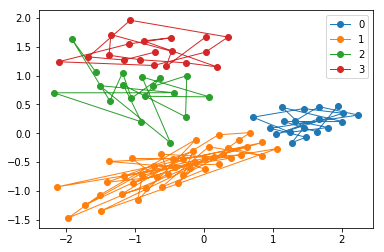

In [339]:
#plt.plot(pca1[0][:,0],pca1[0][:,1])

cc_x = clustering.clustercenters[:,0]
cc_y = clustering.clustercenters[:,1]

M = pyemma.msm.estimate_markov_model(dtrajs, 10)
n_sets = 4
M.pcca(n_sets)
pcca_dist = M.metastable_distributions
membership = M.metastable_memberships  # get PCCA memberships

for i in range(n_sets):
    sset=np.where(M.metastable_assignments==i)[0]
    plt.plot(cc_x[sset],cc_y[sset],label='%d'%i,linewidth=1, marker='o')
plt.legend()
plt.show()

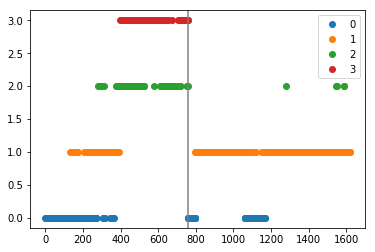

In [350]:
pcca_traj = np.concatenate([M.metastable_assignments[dtraj]  for dtraj in dtrajs])

for i in range(n_sets):
    sset=np.where(pcca_traj==i)[0]
    plt.plot(sset,0*sset+i,label='%d'%i,linewidth=0, marker='o')
plt.legend()
plt.axvline(x=data1.shape[0],color='gray')
plt.show()

In [368]:
df=pd.DataFrame({'cluster':pcca_traj})
df.groupby('cluster').size()/len(df)

cluster
0    0.218519
1    0.541358
2    0.118519
3    0.121605
dtype: float64

In [369]:
pcca_samples = M.sample_by_distributions(pcca_dist, 10)

In [372]:
names = [f'interface_cluster{i}.xtc' for i in range(n_sets)]
if True:
    pyemma.coordinates.save_trajs(inp, pcca_samples, outfiles=names)

In [371]:
names

['interface_cluster0.xtc',
 'interface_cluster1.xtc',
 'interface_cluster2.xtc',
 'interface_cluster3.xtc']